# Introduction
The goal of this project is to analyze a synthetic dataset from the National Parks Service. 

# Import Python Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the Data
In this analysis we are going to be examining two datasets. 

In [3]:
observations = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/Endangered%20Species/observations.csv')
species = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/Endangered%20Species/species_info.csv')

# Species
The species dataset consists of 4 columns: category, scientific name, common names, and conservation status. 

In [4]:
species.head()

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN

# Observations
The oberservations dataset consists 3 of columns: scientific name, park name, and number of observations.

In [6]:
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

# Exploratory Data Analysis (EDA)
To begin our exploratory data analysis we are going to join our datasets so we can compare variables.

In [8]:
df = observations.merge(species, how='inner')
df.head()

scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN

In [47]:
observations_shape = observations.shape
species_shape = species.shape
df_shape = df.shape
print(f'The species has {species_shape[0]} rows and {species_shape[1]} columns while observations has {observations_shape[0]} rows and {observations_shape[1]} columns.')
print(f'Together, the merged dataframe has {df_shape[0]} rows and {df_shape[1]} columns.')

The species has 5824 rows and 4 columns while observations has 23296 rows and 3 columns.
Together, the merged dataframe has 25632 rows and 6 columns.


## What are the average number of animal observations at each park?

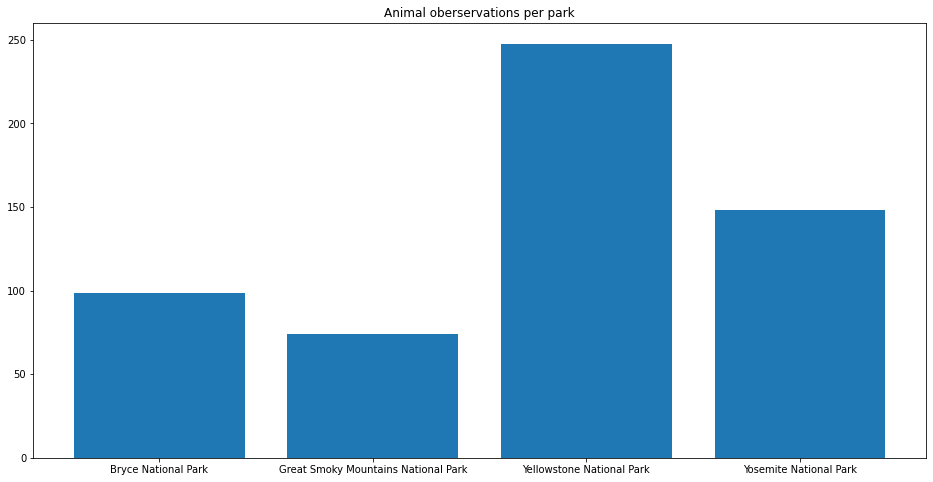

<Figure size 432x288 with 0 Axes>

In [41]:
mean_observations = df.groupby('park_name')['observations'].mean()
plt.figure(figsize=(16,8))
plt.bar(mean_observations.index, mean_observations)
plt.title('Animal oberservations per park')
plt.show()
plt.clf()

According to our bar graph, it seems that Yellowstone is the winner when it comes to mean animal observations. What does that mean exactly? Well to put it frankly they see more animals, but because it is the average of all animals in the area it is greatly influenced by outliers. For example, if there is a common animal in the area that never seems to go away, it could be skewing Yosemite to its high average. Nevertheless, if you want to see more animals it seems that Yosemite is your best bet.

# Data Scrubbing

In [53]:
df.conservation_status.fillna('Least Concern', inplace=True)
df.groupby('conservation_status').sum()

observations
conservation_status              
Endangered                   3513
In Recovery                  2107
Least Concern             3542326
Species of Concern          93962
Threatened                   3339

In [56]:
df.isna().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

# Conclusions